In [15]:
# Dependencies
import numpy as np
import pandas as pd
import seaborn as sns



# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 

june_results = session.query(Measurement.date,Measurement.tobs).filter(extract('month' , Measurement.date)==6).all()
june_results

[('2010-06-01', 78.0),
 ('2010-06-02', 76.0),
 ('2010-06-03', 78.0),
 ('2010-06-04', 76.0),
 ('2010-06-05', 77.0),
 ('2010-06-06', 78.0),
 ('2010-06-07', 77.0),
 ('2010-06-08', 78.0),
 ('2010-06-09', 78.0),
 ('2010-06-10', 79.0),
 ('2010-06-11', 78.0),
 ('2010-06-12', 78.0),
 ('2010-06-13', 78.0),
 ('2010-06-14', 77.0),
 ('2010-06-15', 78.0),
 ('2010-06-16', 78.0),
 ('2010-06-17', 77.0),
 ('2010-06-18', 77.0),
 ('2010-06-19', 82.0),
 ('2010-06-20', 78.0),
 ('2010-06-21', 78.0),
 ('2010-06-22', 78.0),
 ('2010-06-23', 78.0),
 ('2010-06-24', 78.0),
 ('2010-06-25', 77.0),
 ('2010-06-26', 76.0),
 ('2010-06-27', 78.0),
 ('2010-06-28', 78.0),
 ('2010-06-29', 78.0),
 ('2010-06-30', 78.0),
 ('2011-06-01', 77.0),
 ('2011-06-02', 78.0),
 ('2011-06-03', 73.0),
 ('2011-06-04', 70.0),
 ('2011-06-05', 76.0),
 ('2011-06-06', 77.0),
 ('2011-06-07', 77.0),
 ('2011-06-08', 77.0),
 ('2011-06-09', 77.0),
 ('2011-06-10', 78.0),
 ('2011-06-11', 77.0),
 ('2011-06-12', 77.0),
 ('2011-06-13', 78.0),
 ('2011-06-

In [5]:
#  3. Convert the June temperatures to a list.
june_list = list(june_results)

In [6]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_temp_df = pd.DataFrame(june_list, columns=['date',' June Temps'])

june_temp_df.set_index(june_temp_df['date'],inplace =False)
print(june_temp_df.to_string(index=False))

      date   June Temps
2010-06-01         78.0
2010-06-02         76.0
2010-06-03         78.0
2010-06-04         76.0
2010-06-05         77.0
2010-06-06         78.0
2010-06-07         77.0
2010-06-08         78.0
2010-06-09         78.0
2010-06-10         79.0
2010-06-11         78.0
2010-06-12         78.0
2010-06-13         78.0
2010-06-14         77.0
2010-06-15         78.0
2010-06-16         78.0
2010-06-17         77.0
2010-06-18         77.0
2010-06-19         82.0
2010-06-20         78.0
2010-06-21         78.0
2010-06-22         78.0
2010-06-23         78.0
2010-06-24         78.0
2010-06-25         77.0
2010-06-26         76.0
2010-06-27         78.0
2010-06-28         78.0
2010-06-29         78.0
2010-06-30         78.0
2011-06-01         77.0
2011-06-02         78.0
2011-06-03         73.0
2011-06-04         70.0
2011-06-05         76.0
2011-06-06         77.0
2011-06-07         77.0
2011-06-08         77.0
2011-06-09         77.0
2011-06-10         78.0
2011-06-11      

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


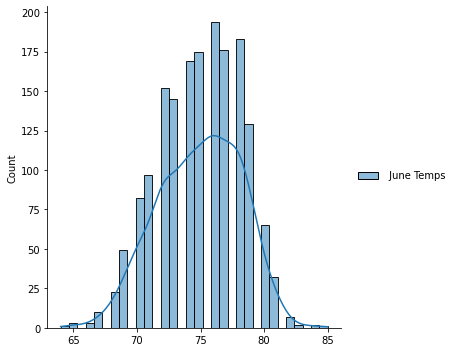

In [18]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.

sns.displot(june_temp_df, kde=True)
june_temp_df.describe()


In [30]:
# Stats for Temperature for Each Station During June.

june_station = session.query(Measurement.tobs, Measurement.station).filter(extract('month',Measurement.date)== 6).all()
june_station_df=pd.DataFrame(june_station,columns=['June Temps', 'Station'])
june_station_df.head(10)



,June Temps,Station
0,78.0,USC00519397
1,76.0,USC00519397
2,78.0,USC00519397
3,76.0,USC00519397
4,77.0,USC00519397
5,78.0,USC00519397
6,77.0,USC00519397
7,78.0,USC00519397
8,78.0,USC00519397
9,79.0,USC00519397


In [47]:
# Stats for Precipitation For June.

june_prcp = session.query(Measurement.tobs, Measurement.prcp).filter(extract('month',Measurement.date)== 6).all()
june_prcp_df=pd.DataFrame(june_prcp,columns=['June Temps', 'Precipitation(Inches)'])
june_prcp_df.describe()

,June Temps,Precipitation(Inches)
count,1700.000000,1574.000000
mean,74.944118,0.136360
std,3.257417,0.335731
min,64.000000,0.000000
25%,73.000000,0.000000
50%,75.000000,0.020000
75%,77.000000,0.120000
max,85.000000,4.430000


## D2: Determine the Summary Statistics for December

In [8]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec_results = session.query(Measurement.date,Measurement.tobs).filter(extract('month' , Measurement.date)==12).all()
dec_results

[('2010-12-01', 76.0),
 ('2010-12-03', 74.0),
 ('2010-12-04', 74.0),
 ('2010-12-06', 64.0),
 ('2010-12-07', 64.0),
 ('2010-12-08', 67.0),
 ('2010-12-09', 77.0),
 ('2010-12-10', 66.0),
 ('2010-12-11', 69.0),
 ('2010-12-12', 68.0),
 ('2010-12-13', 68.0),
 ('2010-12-14', 71.0),
 ('2010-12-15', 74.0),
 ('2010-12-16', 67.0),
 ('2010-12-17', 66.0),
 ('2010-12-18', 69.0),
 ('2010-12-19', 71.0),
 ('2010-12-23', 70.0),
 ('2010-12-24', 70.0),
 ('2010-12-26', 74.0),
 ('2010-12-27', 74.0),
 ('2010-12-28', 71.0),
 ('2010-12-29', 75.0),
 ('2010-12-30', 75.0),
 ('2010-12-31', 72.0),
 ('2011-12-01', 69.0),
 ('2011-12-02', 68.0),
 ('2011-12-03', 73.0),
 ('2011-12-04', 74.0),
 ('2011-12-05', 73.0),
 ('2011-12-06', 73.0),
 ('2011-12-07', 73.0),
 ('2011-12-08', 73.0),
 ('2011-12-09', 71.0),
 ('2011-12-10', 73.0),
 ('2011-12-11', 73.0),
 ('2011-12-12', 77.0),
 ('2011-12-13', 72.0),
 ('2011-12-14', 71.0),
 ('2011-12-15', 73.0),
 ('2011-12-16', 70.0),
 ('2011-12-17', 73.0),
 ('2011-12-18', 69.0),
 ('2011-12-

In [9]:
# 7. Convert the December temperatures to a list.
dec_list=list(dec_results)

In [10]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_temp_df = pd.DataFrame(dec_list, columns=['date',' Dec Temps'])
dec_temp_df.set_index(dec_temp_df['date'],inplace =False)
print(dec_temp_df.to_string(index=False))


      date   Dec Temps
2010-12-01        76.0
2010-12-03        74.0
2010-12-04        74.0
2010-12-06        64.0
2010-12-07        64.0
2010-12-08        67.0
2010-12-09        77.0
2010-12-10        66.0
2010-12-11        69.0
2010-12-12        68.0
2010-12-13        68.0
2010-12-14        71.0
2010-12-15        74.0
2010-12-16        67.0
2010-12-17        66.0
2010-12-18        69.0
2010-12-19        71.0
2010-12-23        70.0
2010-12-24        70.0
2010-12-26        74.0
2010-12-27        74.0
2010-12-28        71.0
2010-12-29        75.0
2010-12-30        75.0
2010-12-31        72.0
2011-12-01        69.0
2011-12-02        68.0
2011-12-03        73.0
2011-12-04        74.0
2011-12-05        73.0
2011-12-06        73.0
2011-12-07        73.0
2011-12-08        73.0
2011-12-09        71.0
2011-12-10        73.0
2011-12-11        73.0
2011-12-12        77.0
2011-12-13        72.0
2011-12-14        71.0
2011-12-15        73.0
2011-12-16        70.0
2011-12-17        73.0
2011-12-18 

,Dec Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


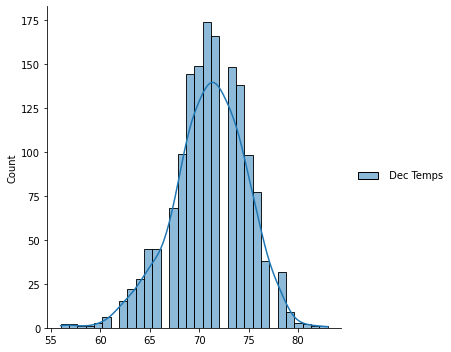

In [51]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
sns.displot(dec_temp_df,kde=True)


dec_temp_df.describe()



In [53]:
# Stats for Precipitation For December
dec_prcp = session.query(Measurement.tobs, Measurement.prcp).filter(extract('month',Measurement.date)== 12).all()
dec_prcp_df=pd.DataFrame(dec_prcp,columns=['Dec Temps', 'Precipitation(Inches)'])
dec_prcp_df.describe()

,Dec Temps,Precipitation(Inches)
count,1517.000000,1405.000000
mean,71.041529,0.216819
std,3.745920,0.541399
min,56.000000,0.000000
25%,69.000000,0.000000
50%,71.000000,0.030000
75%,74.000000,0.150000
max,83.000000,6.420000


In [54]:
# Stats for Temperature for Each Station During December

dec_station = session.query(Measurement.tobs, Measurement.station).filter(extract('month',Measurement.date)== 12).all()
dec_station_df=pd.DataFrame(dec_station,columns=['Dec Temps', 'Station'])
dec_station_df.head(10)

,Dec Temps,Station
0,76.0,USC00519397
1,74.0,USC00519397
2,74.0,USC00519397
3,64.0,USC00519397
4,64.0,USC00519397
5,67.0,USC00519397
6,77.0,USC00519397
7,66.0,USC00519397
8,69.0,USC00519397
9,68.0,USC00519397


In [40]:
# Comparing Temperature For Stations :

station_df = june_station_df.merge(dec_station_df ,on ="Station" , how = "inner" ).set_index("Station")
station_df.head(10)


,June Temps,Dec Temps
Station,,
USC00519397,78.0,75.0
USC00519397,78.0,73.0
USC00519397,78.0,73.0
USC00519397,78.0,77.0
USC00519397,78.0,76.0
USC00519397,78.0,77.0
USC00519397,78.0,76.0
USC00519397,78.0,73.0
USC00519397,78.0,73.0
